In [1]:
from qcodes import Parameter
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
import numpy as np

In [2]:
x = Parameter(name='x', label='Slave', set_cmd=None, get_cmd=None)
y = Parameter(name='y', label='Master', set_cmd=None, get_cmd=None)
meas = Measurement()
meas.register_parameter(x)
meas.register_parameter(y, setpoints=[x])

with meas.run() as datasaver:
    
    vy = 0
    for ix, vx in enumerate(np.random.randn(250)):
        #sleep(0.1)
        #print(f"{ix+1}:250")
        datasaver.add_result((x, ix), (y, vy))
        vy += vx
        
dataid = datasaver.run_id

Starting experimental run with id: 238


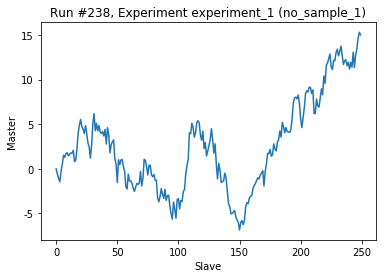

In [6]:
ax, cb = plot_by_id(dataid)